### Network Analysis: Two-Mode Networks

Homework Team 4 - John Grando, Nick Capofari, Ken Markus, Armenoush Aslanian-Persico, Andrew Goldberg

MSDA Data 620, Week 3 Part 2

### Introduction

In this assignment we want to analyze two-node networks and determine relationships between nodes. 

The dataset represents observed attendance at 14 social events by 18 Southern women in the 1930s. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

What can we infer about the relationships between the women and social events?

See https://rdrr.io/cran/latentnet/man/davis.html for more information on the dataset.

In [147]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('m', { // # added keyboard shortcut for Jupyter - Ctrl+M, then m runs all cells
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

### Load packages

In [148]:
import networkx as nx
import networkx.algorithms
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plt
import numpy
import pandas as pd

from networkx.algorithms.components.connected import connected_components
from scipy.spatial import distance
from scipy.cluster import hierarchy
from collections import defaultdict

% matplotlib inline

### Load data and view summary statistics

In [149]:
G = nx.davis_southern_women_graph()
women, events = nx.bipartite.sets(G)

In [150]:
nx.is_connected(G) 

True

The graph is connected, with no unconnected elements.

In [151]:
bipartite.is_bipartite(G)

True

The graph is bipartite.

In [152]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


The average degree connectivity is the average nearest neighbor degree of nodes with degree k. 

### Graph 1: Bipartite Projection, Unweighted
E nodes indicate social events; named nodes indicate participants.

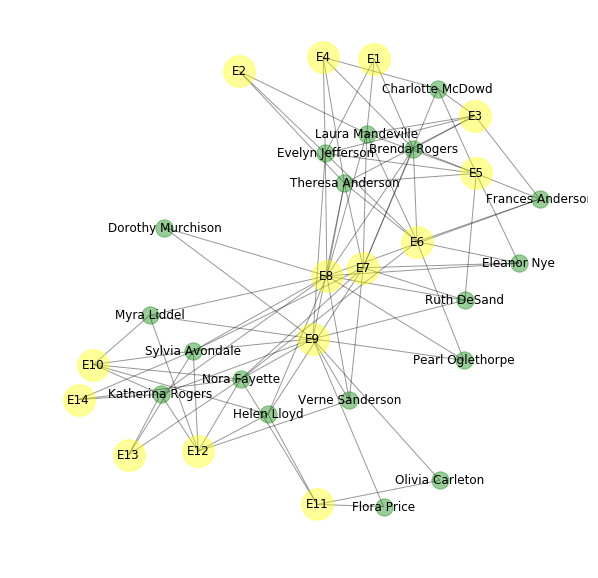

In [153]:
plt.figure(figsize = (10, 10))
plt.axis('off')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='green', alpha = 0.4)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='yellow', alpha = 0.4, node_size = 1000)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

### Graph 2: Bipartite Projection, Weighted
"E" nodes indicate social events; named nodes indicate participants.
Nodes with more connections are displayed larger.

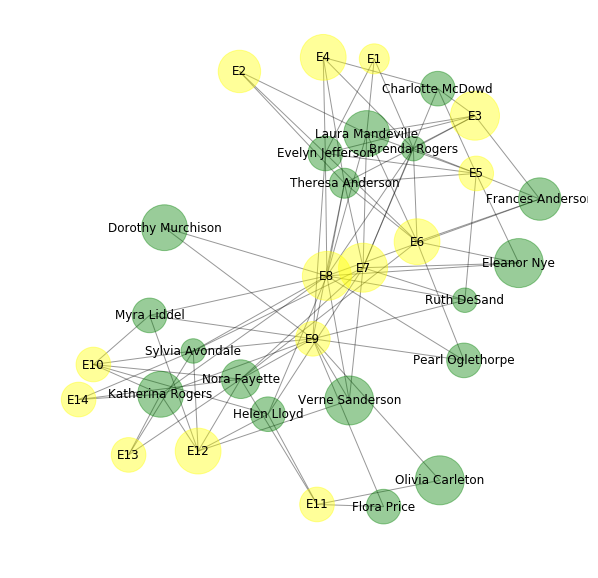

In [154]:
plt.figure(figsize = (10, 10))
plt.axis('off')
node_sizes=[G.degree(i)*300 for i in G.nodes()]
#nx.draw_networkx(G,pos, node_size=node_sizes,with_labels=True, alpha = 0.8, node_color="orange")

nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='green', alpha = 0.4, node_size = node_sizes)
nx.draw_networkx_nodes(G, pos, nodelist=events, node_color='yellow', alpha = 0.4, node_size = node_sizes)
nx.draw_networkx_edges(G, pos, alpha = 0.4)
nx.draw_networkx_labels(G, pos);

### Graph 3: Unipartite Projection, Women
View weights of associations between nodes.

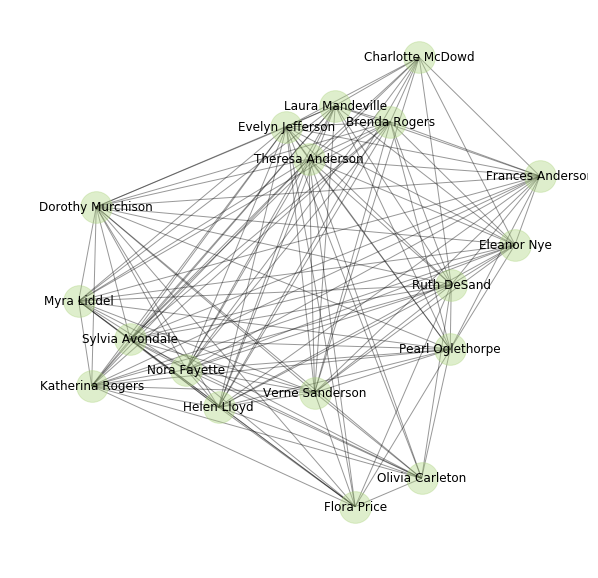

In [155]:
BPWomen = bipartite.projected_graph(G, women)
plt.figure(figsize = (10, 10))
plt.axis('off')

nx.draw_networkx_nodes(BPWomen, pos, nodelist=women, node_color='#aed581', alpha = 0.4, node_size=1000)
nx.draw_networkx_edges(BPWomen, pos, alpha = 0.4)
nx.draw_networkx_labels(BPWomen, pos);

In [156]:
print("Connections, Woman")
for i in women:
    print('%d %s' % (BPWomen.degree(i),i))

Connections, Woman
17 Verne Sanderson
16 Dorothy Murchison
15 Eleanor Nye
16 Katherina Rogers
16 Pearl Oglethorpe
12 Flora Price
17 Evelyn Jefferson
17 Theresa Anderson
16 Myra Liddel
17 Helen Lloyd
11 Charlotte McDowd
15 Frances Anderson
15 Laura Mandeville
12 Olivia Carleton
17 Nora Fayette
17 Ruth DeSand
15 Brenda Rogers
17 Sylvia Avondale


In [157]:
def topcentrality(G):
    toplist = sorted(G.items(), key=lambda kv: (-kv[1], kv[0]) ) 
    return toplist

In [158]:
topcentrality(nx.betweenness_centrality(BPWomen))

[('Evelyn Jefferson', 0.010122230710466005),
 ('Helen Lloyd', 0.010122230710466005),
 ('Nora Fayette', 0.010122230710466005),
 ('Ruth DeSand', 0.010122230710466005),
 ('Sylvia Avondale', 0.010122230710466005),
 ('Theresa Anderson', 0.010122230710466005),
 ('Verne Sanderson', 0.010122230710466005),
 ('Dorothy Murchison', 0.005347593582887701),
 ('Katherina Rogers', 0.005347593582887701),
 ('Myra Liddel', 0.005347593582887701),
 ('Pearl Oglethorpe', 0.005347593582887701),
 ('Brenda Rogers', 0.00267379679144385),
 ('Eleanor Nye', 0.00267379679144385),
 ('Frances Anderson', 0.00267379679144385),
 ('Laura Mandeville', 0.00267379679144385),
 ('Charlotte McDowd', 0.0),
 ('Flora Price', 0.0),
 ('Olivia Carleton', 0.0)]

### Graph 4: Unipartite Projection, Events
View weights of associations between nodes.

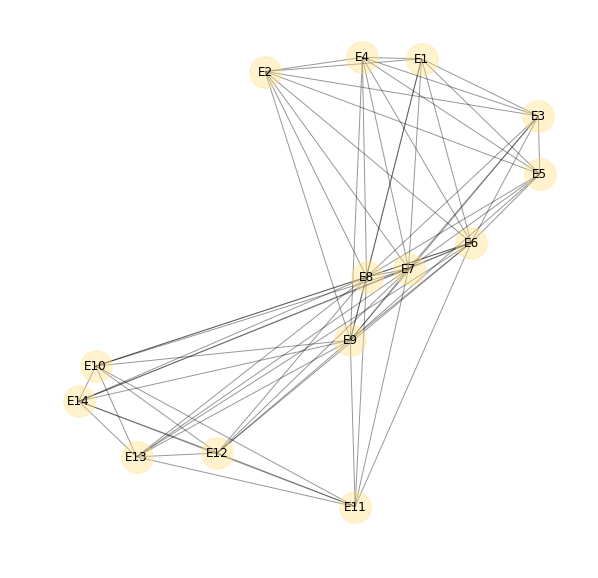

In [159]:
BPEvents = bipartite.projected_graph(G, events)
plt.figure(figsize = (10, 10))
plt.axis('off')

nx.draw_networkx_nodes(BPEvents, pos, nodelist=events, node_color='#ffe082', alpha = 0.4, node_size=1000)
nx.draw_networkx_edges(BPEvents, pos, alpha = 0.4)
nx.draw_networkx_labels(BPEvents, pos);

In [160]:
print("Event, Connections")
for i in events:
    print('%s %d' % (i, BPEvents.degree(i)))

Event, Connections
E7 13
E4 8
E8 13
E12 8
E11 8
E13 8
E10 8
E1 8
E5 8
E14 8
E9 13
E2 8
E6 13
E3 8


In [161]:
topcentrality(nx.betweenness_centrality(BPEvents))

[('E6', 0.08012820512820512),
 ('E7', 0.08012820512820512),
 ('E8', 0.08012820512820512),
 ('E9', 0.08012820512820512),
 ('E1', 0.0),
 ('E10', 0.0),
 ('E11', 0.0),
 ('E12', 0.0),
 ('E13', 0.0),
 ('E14', 0.0),
 ('E2', 0.0),
 ('E3', 0.0),
 ('E4', 0.0),
 ('E5', 0.0)]

### Graph 5: Ego Networks

View connections related to one individual.

Here we compare a high-centrality node and a low-centrality node.

In [162]:
nx.ego_graph(G, 'Evelyn Jefferson')
ego_net=nx.ego_graph(G, 'Evelyn Jefferson')
print(nx.info(ego_net))

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 8
Average degree:   1.7778


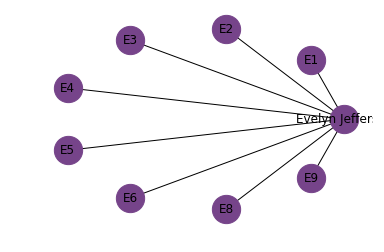

In [163]:
pos=nx.shell_layout(ego_net)
nx.draw_networkx(ego_net, pos, node_size=800, node_color='#76448A')
plt.axis('off')
plt.figure(figsize = (10, 10))

In [166]:
nx.ego_graph(G, 'Flora Price')
ego_net2=nx.ego_graph(G, 'Flora Price')
print(nx.info(ego_net))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


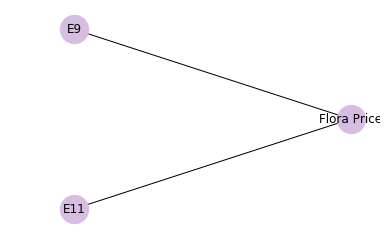

In [167]:
pos=nx.shell_layout(ego_net)
nx.draw_networkx(ego_net2, pos, node_size=800, node_color='#D7BDE2')
plt.axis('off')
plt.figure(figsize = (10, 10))

### Conclusion

We can see that events and attendees are closely connected. 

Seven women had a centrality meausre of 0.010 or higher.

Four events had a centrality measure of 0.08 or higher. 

Strong centrality for these nodes was visible in the graph projections, as the nodes were centrally located and closely connected.